In [336]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.linear_model import LinearRegression as sklLR
plt.style.use("ggplot")
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


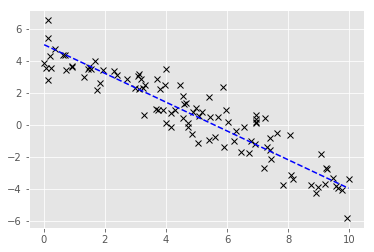

In [337]:
n = 100
b0 = 5
b1 = -0.9
x = scs.uniform(0,10).rvs(n)
y = b0 + b1*x + scs.norm(0,1).rvs(n)
xmin = x.min()
xmax = x.max()
plt.plot(x, y, 'kx')
plt.plot([xmin, xmax], [b0+b1*xmin, b0+b1*xmax], 'b--');

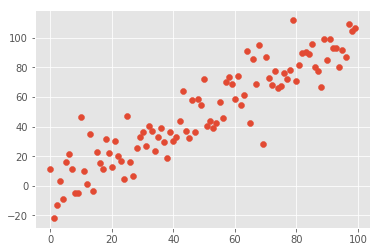

In [338]:
y = np.random.randn(100)*np.random.randint(8,20,100) + np.arange(100)
X = np.arange(100)
plt.scatter(X,y);

In [339]:
X = X.reshape(100,1)
y = y.reshape(100,1)

In [349]:
lr = sklLR()

In [350]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [351]:
coef = lr.coef_[0][0]
intcpt = lr.intercept_[0]

In [356]:
resid = y-(intcpt+X*coef)

In [373]:
def rsse(beta, intcpt, X, y):
    y_hat = intcpt + beta*X
    return np.sum((y - y_hat)**2)

### When plotting residuals as below: plt.plot([x_start, x_finish], [y_start, y_finish])

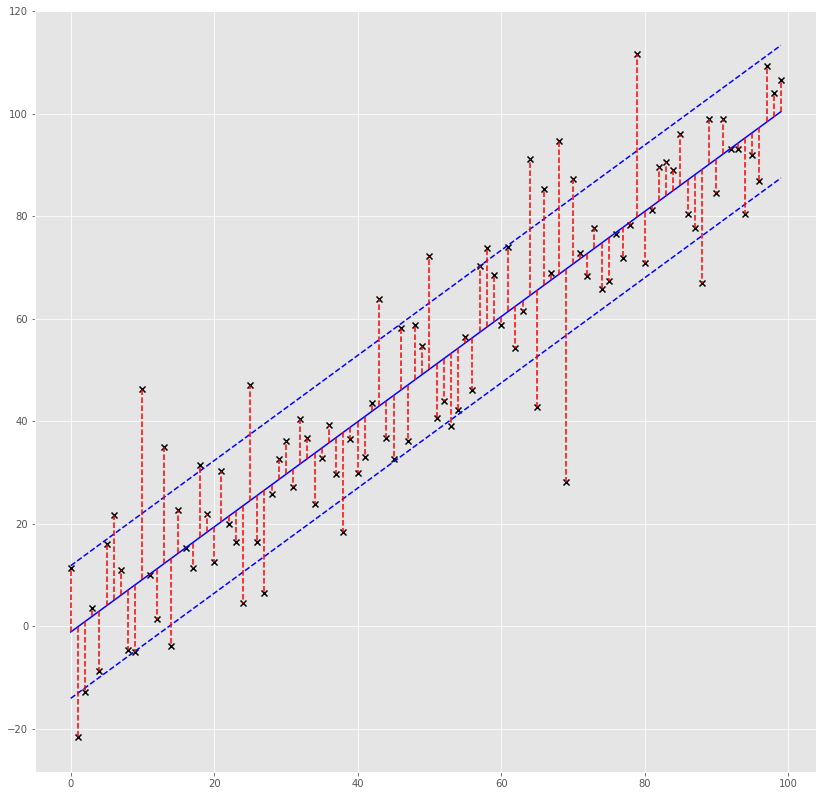

In [364]:
fig, ax = plt.subplots(figsize=(14,14))
ax.scatter(X,y,c='k', marker='x')
ax.plot(X, X*coef+ intcpt, 'b-')
ax.plot(X, X*coef + intcpt + np.std(resid), 'b--')
ax.plot(X, X*coef + intcpt - np.std(resid), 'b--')
for x,n in zip(X, resid):
    ax.plot([x, x],[x*coef+intcpt, n+x*coef+intcpt],'r--')

## Creating a fit method.

First set the $\beta$s to initialized values. Calculate the residual sum of square error, as well as the slope of the cost function at that location and then update the weights based off of the error multiplied by some step interval.

$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ...$

$$
\begin{align}
RSSE &= \sum_n{\frac{1}{2}(y_n - \hat{y}_n)^2} \\
&= \sum_n{\frac{1}{2}(y_n - (\beta_0 + \beta_1x_{1n} + \beta_2x_{2n} + ...))^2}
\end{align}
$$

If we want the slope at a given value of $\beta$ then:
$$
\begin{align}
\frac{\delta}{\delta\beta_l} RSSE &= \sum_n{\frac{1}{2}\frac{\delta}{\delta\beta_n}(y_n - (\beta_0 + \beta_1x_{1n} + \beta_2x_{2n} + ...))^2} \\
& = \sum_n{(y_n - (\beta_0 + \beta_1x_{1n} + \beta_2x_{2n} + ...))x_{ln}} \\
& = \sum_n{(y_n - \hat{y}_n)x_{ln}}
\end{align}
$$
Where $x_{ln}$ is the $l^{th}$ feature that corrisponds to the $l^{th}$ $\beta$. And $x_0$ = 1

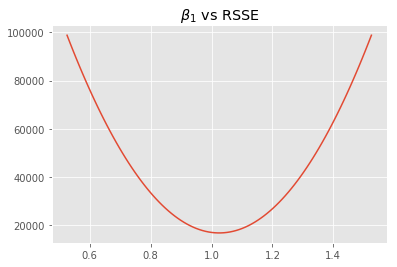

In [376]:
v = np.linspace(coef-.5,coef+.5, 100)
rs = []
for i in v:
    rs.append(rsse(i, intcpt, X, y))

fig, ax = plt.subplots()
ax.plot(v,rs)
ax.title.set_text(r"$\beta_1$ vs RSSE");

In [367]:
from src.linearregression import LinearRegression

In [368]:
lr1 = LinearRegression()

In [369]:
lr1.fit(X,y)

In [370]:
my_intcpt, my_coef = lr1.coef_

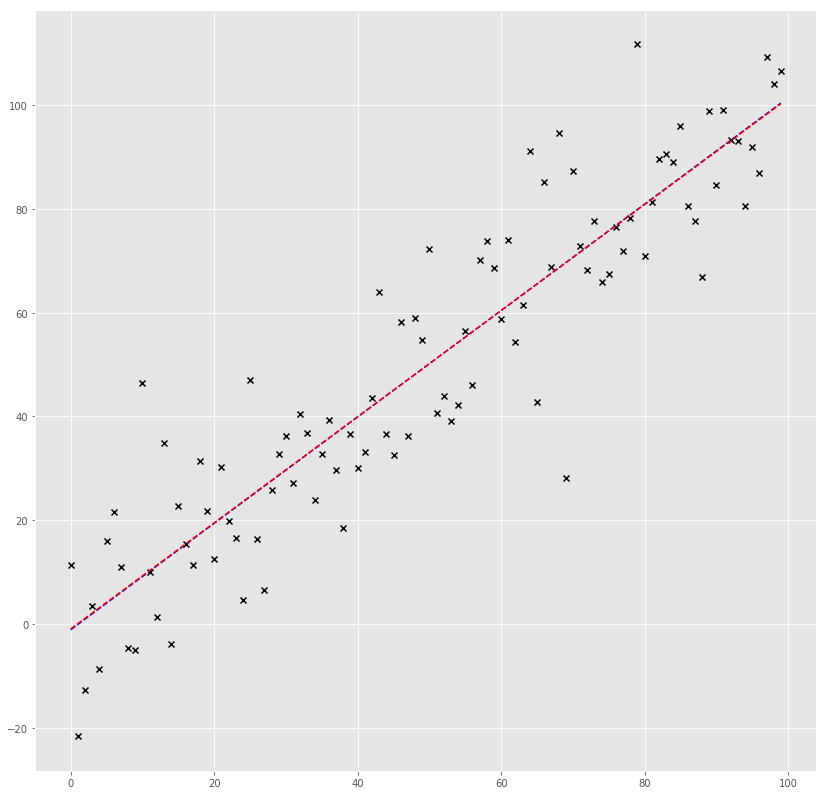

In [378]:
fig, ax = plt.subplots(figsize=(14,14))
ax.scatter(X,y,c='k', marker='x')
ax.plot(X, X*coef + intcpt, 'b--')
ax.plot(X, X*my_coef + my_intcpt, 'r--');

In [372]:
my_coef, coef, my_intcpt, intcpt

(1.0223897350332591,
 1.0252667195914746,
 -0.96413614709625572,
 -1.1176671151153954)

In [377]:
rsse(coef, intcpt, X, y), rsse(my_coef, my_intcpt, X, y)

(16744.197282763784, 16744.899333090973)